**Perform feature engineering for all the operations decided in previous EDA.**


1. Missing values replacement
2. Categorical features to numerical features
3. Outliers removal
4. Non-normal distributed features to normal distributed features



In [122]:
import pandas as pd
import numpy as np

**Finding Missing Value**

In [123]:
df=pd.read_csv('titanic.csv')
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
687,688,0,3,"Dakic, Mr. Branko",male,19.0,0,0,349228,10.1708,NaN,S
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S
561,562,0,3,"Sivic, Mr. Husein",male,40.0,0,0,349251,7.8958,NaN,S
69,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S
399,400,1,2,"Trout, Mrs. William H (Jessie L)",female,28.0,0,0,240929,12.6500,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
811,812,0,3,"Lester, Mr. James",male,39.0,0,0,A/4 48871,24.1500,NaN,S


In [124]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Deferentiate Numerical and Categorical Value**

In [125]:
Numerical=list(df.select_dtypes(exclude='object'))
Categorical=list(df.select_dtypes(include='object'))
Numerical
Categorical

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

**Now Differentiating Which cols have missing Value**

In [126]:
missing=[]
for col in df.columns:
  if df[col].isnull().sum()>0:
    missing.append(col)
missing

['Age', 'Cabin', 'Embarked']

In [127]:
for col in missing:
  if col in Numerical:
    df[col].fillna(df[col].mean(),inplace=True)
  else:
    df[col].fillna(df[col].mode()[0],inplace=True)
df.isnull().sum()

<ipython-input-127-a8445aab04e8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)
<ipython-input-127-a8445aab04e8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [128]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
445,446,1,1,"Dodge, Master. Washington",male,4.000000,0,2,33638,81.8583,A34,S
455,456,1,3,"Jalsevac, Mr. Ivan",male,29.000000,0,0,349240,7.8958,B96 B98,C
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.000000,0,2,11752,26.2833,D47,S
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.000000,0,0,35851,7.7333,B96 B98,Q
284,285,0,1,"Smith, Mr. Richard William",male,29.699118,0,0,113056,26.0000,A19,S
773,774,0,3,"Elias, Mr. Dibo",male,29.699118,0,0,2674,7.2250,B96 B98,C
823,824,1,3,"Moor, Mrs. (Beila)",female,27.000000,0,1,392096,12.4750,E121,S
407,408,1,2,"Richards, Master. William Rowe",male,3.000000,1,1,29106,18.7500,B96 B98,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,B96 B98,Q
428,429,0,3,"Flynn, Mr. James",male,29.699118,0,0,364851,7.7500,B96 B98,Q


# *Categorical features to numerical features*

In Level Enoding there is a problem that if there are three category of that columns value and we encoded it as 1,2,3 then they will be considered as ordered means 1>2>3 but in reality it should not be so we use One Hot Encoding

In [129]:
#Get Dummy Variable For Sex
dummies=pd.get_dummies(df.Sex)
dummies

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [130]:
#Merging with original DataFrame By Concat Method
Merged=pd.concat([df,dummies],axis='columns')
Merged

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,True,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S,True,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,False,True


In [131]:
#Droping The original Sex Column and One Column
df=Merged.drop(['Sex','female'],axis='columns')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,False
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",39.0,1,5,347082,31.2750,B96 B98,S,False
796,797,1,1,"Leader, Dr. Alice (Farnham)",49.0,0,0,17465,25.9292,D17,S,False
544,545,0,1,"Douglas, Mr. Walter Donald",50.0,1,0,PC 17761,106.4250,C86,C,True
834,835,0,3,"Allum, Mr. Owen George",18.0,0,0,2223,8.3000,B96 B98,S,True


In [132]:
# Now For Embarked
dummies=pd.get_dummies(df.Embarked)
dummies

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [133]:
Merged=pd.concat([df,dummies],axis='columns')
Merged

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,B96 B98,S,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,S,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,B96 B98,S,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,B96 B98,S,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,S,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,B96 B98,S,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,C,True,True,False,False


In [134]:
df=Merged.drop(['Embarked','C'],axis='columns')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S
60,61,0,3,"Sirayanian, Mr. Orsen",22.000000,0,0,2669,7.2292,B96 B98,True,False,False
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",63.000000,1,0,13502,77.9583,D7,False,False,True
667,668,0,3,"Rommetvedt, Mr. Knud Paust",29.699118,0,0,312993,7.7750,B96 B98,True,False,True
785,786,0,3,"Harmer, Mr. Abraham (David Lishin)",25.000000,0,0,374887,7.2500,B96 B98,True,False,True
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",36.000000,0,1,PC 17755,512.3292,B51 B53 B55,True,False,False


In [135]:
#Get Dummies for Fare
dummies=pd.get_dummies(df.Cabin)
dummies.shape

(891, 147)

**We Can See Here Our Shape of data is much More high so we cannot use Encoding Like This it will slow down our model Training**

In [136]:
# What i wil do is I will Extract Text Part From the Cabin Using Re
import re

In [137]:
cabin1=df.Cabin.values
cabin1

array(['B96 B98', 'C85', 'B96 B98', 'C123', 'B96 B98', 'B96 B98', 'E46',
       'B96 B98', 'B96 B98', 'B96 B98', 'G6', 'C103', 'B96 B98',
       'B96 B98', 'B96 B98', 'B96 B98', 'B96 B98', 'B96 B98', 'B96 B98',
       'B96 B98', 'B96 B98', 'D56', 'B96 B98', 'A6', 'B96 B98', 'B96 B98',
       'B96 B98', 'C23 C25 C27', 'B96 B98', 'B96 B98', 'B96 B98', 'B78',
       'B96 B98', 'B96 B98', 'B96 B98', 'B96 B98', 'B96 B98', 'B96 B98',
       'B96 B98', 'B96 B98', 'B96 B98', 'B96 B98', 'B96 B98', 'B96 B98',
       'B96 B98', 'B96 B98', 'B96 B98', 'B96 B98', 'B96 B98', 'B96 B98',
       'B96 B98', 'B96 B98', 'D33', 'B96 B98', 'B30', 'C52', 'B96 B98',
       'B96 B98', 'B96 B98', 'B96 B98', 'B96 B98', 'B28', 'C83',
       'B96 B98', 'B96 B98', 'B96 B98', 'F33', 'B96 B98', 'B96 B98',
       'B96 B98', 'B96 B98', 'B96 B98', 'B96 B98', 'B96 B98', 'B96 B98',
       'F G73', 'B96 B98', 'B96 B98', 'B96 B98', 'B96 B98', 'B96 B98',
       'B96 B98', 'B96 B98', 'B96 B98', 'B96 B98', 'B96 B98', 'B96 B98',

In [138]:
for i in range(len(cabin1)):
  s=''.join(re.findall(r'[a-zA-Z]+',str(cabin1[i])))
  s=''.join(set(s))
  cabin1[i]=s
cabin1

array(['B', 'C', 'B', 'C', 'B', 'B', 'E', 'B', 'B', 'B', 'G', 'C', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'D', 'B', 'A', 'B', 'B',
       'B', 'C', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'D', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'B',
       'B', 'F', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'FG', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'B',
       'B', 'E', 'B', 'B', 'B', 'A', 'D', 'B', 'B', 'B', 'B', 'D', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'E', 'D', 'B', 'B', 'B', 'FE', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'D', 'C', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'F', 'B', 'B', 'C', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'E', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'C', 'B', 'B', 

In [139]:
np.unique(cabin1)

array(['A', 'B', 'C', 'D', 'E', 'F', 'FE', 'FG', 'G', 'T'], dtype=object)

In [140]:
cabin1=pd.DataFrame(cabin1,columns=['cabin'])
cabin1

,cabin
0,B
1,C
2,B
3,C
4,B
...,...
886,B
887,B
888,B
889,C


In [141]:
df=pd.concat([df,cabin1],axis='columns')
df.sample(10)
df.sample(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S,cabin
784,785,0,3,"Ali, Mr. William",25.000000,0,0,SOTON/O.Q. 3101312,7.0500,B,True,False,True,B
391,392,1,3,"Jansson, Mr. Carl Olof",21.000000,0,0,350034,7.7958,B,True,False,True,B
535,536,1,2,"Hart, Miss. Eva Miriam",7.000000,0,2,F.C.C. 13529,26.2500,B,False,False,True,B
335,336,0,3,"Denkoff, Mr. Mitto",29.699118,0,0,349225,7.8958,B,True,False,True,B
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",49.000000,1,0,PC 17485,56.9292,A,True,False,False,A


In [142]:
df=df.drop(['Cabin'],axis='columns')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S,cabin
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",41.000000,0,2,370129,20.2125,False,False,True,B
246,247,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",25.000000,0,0,347071,7.7750,False,False,True,B
826,827,0,3,"Lam, Mr. Len",29.699118,0,0,1601,56.4958,True,False,True,B
757,758,0,2,"Bailey, Mr. Percy Andrew",18.000000,0,0,29108,11.5000,True,False,True,B
560,561,0,3,"Morrow, Mr. Thomas Rowan",29.699118,0,0,372622,7.7500,True,True,False,B


In [143]:
#Now We Can Get Dummies
dummies=pd.get_dummies(df.cabin)
dummies

,A,B,C,D,E,F,FE,FG,G,T
0,False,True,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
886,False,True,False,False,False,False,False,False,False,False
887,False,True,False,False,False,False,False,False,False,False
888,False,True,False,False,False,False,False,False,False,False
889,False,False,True,False,False,False,False,False,False,False


In [144]:
Merged=pd.concat([df,dummies],axis='columns')
Merged

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,...,A,B,C,D,E,F,FE,FG,G,T
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,True,...,False,True,False,False,False,False,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,False,...,False,False,True,False,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,False,...,False,True,False,False,False,False,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,False,...,False,False,True,False,False,False,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,True,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,True,...,False,True,False,False,False,False,False,False,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,False,...,False,True,False,False,False,False,False,False,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,False,...,False,True,False,False,False,False,False,False,False,False
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,True,...,False,False,True,False,False,False,False,False,False,False


In [145]:
df=Merged.drop(['cabin','A'],axis='columns')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,...,S,B,C,D,E,F,FE,FG,G,T
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",11.0,4,2,347082,31.275,False,...,True,True,False,False,False,False,False,False,False,False
618,619,1,2,"Becker, Miss. Marion Louise",4.0,2,1,230136,39.000,False,...,True,False,False,False,False,True,False,False,False,False
243,244,0,3,"Maenpaa, Mr. Matti Alexanteri",22.0,0,0,STON/O 2. 3101275,7.125,True,...,True,True,False,False,False,False,False,False,False,False
203,204,0,3,"Youseff, Mr. Gerious",45.5,0,0,2628,7.225,True,...,False,True,False,False,False,False,False,False,False,False
286,287,1,3,"de Mulder, Mr. Theodore",30.0,0,0,345774,9.500,True,...,True,True,False,False,False,False,False,False,False,False


# Outliers

<Axes: >

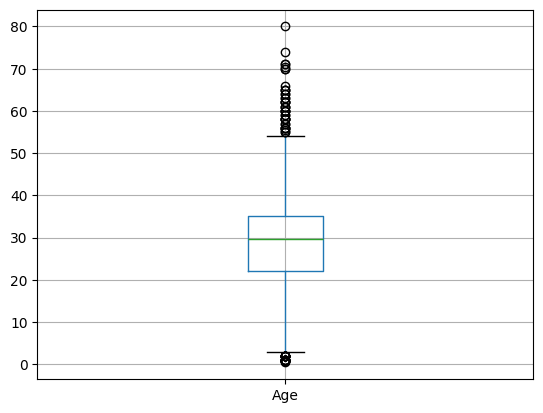

In [146]:
df.boxplot(column=['Age'])

**Remove Outliers By IQR**

In [147]:
#Getting lower and higher limit
l1=df.Age.quantile(0.25)
l2=df.Age.quantile(0.75)

IQR=l2-l1
lower=l1-1.5*IQR
higher=l2+1.5*IQR

lower_array=np.where(df['Age']<=lower)[0]
higher_array=np.where(df['Age']>=higher)[0]

df.drop(index=lower_array,inplace=True)
df.drop(index=higher_array,inplace=True)
df.sample(5)
df.shape

(825, 21)

In [148]:
Numerical

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

**We Should Ignore the outliers for sibsp and parch it is not convenient**

<Axes: >

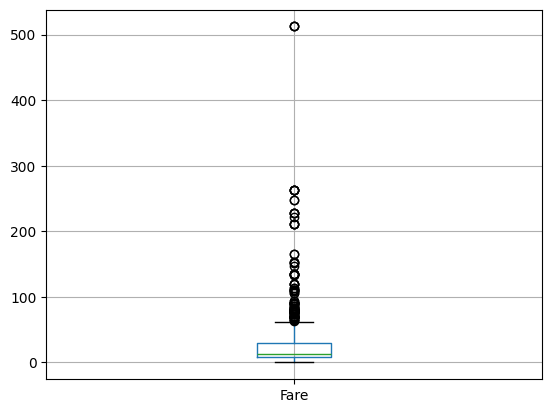

In [149]:
df.boxplot(column=['Fare'])

In [150]:
l1=df.Fare.quantile(0.25)
l3=df.Fare.quantile(0.75)

IQR=l3-l1
lower=l1-1.5*IQR
higher=l3+1.5*IQR

higher_array=np.where(df['Fare']>=higher)[0]
lower_array=np.where(df['Fare']<=lower)[0]
df=df.reset_index(drop=True)
df.drop(index=lower_array,inplace=True)
df.drop(index=higher_array,inplace=True)
df.shape

(718, 21)